In [20]:
import pickle as pkl
import os
import sys
import pandas as pd
from copy import deepcopy
import numpy as np
%matplotlib inline

In [21]:
sys.path.append("../../../")
sys.path.append("../../../../")
sys.path.append("../../")
sys.path.append("../")

In [22]:
from results_processed import *
from linear_interpolation import *

## get all results

In [24]:
# path_rnd = ["../results/german_doc/maa_dn2_itv_3_init_ep50_5_bs8/random_30/dbmdz/bert-base-german-cased_tagger_r_1_qs_random.intermediate_results.pkl"]

path_cema_05_partial = [
                        "../results/german_doc/maa_dn2_itv_3_init_ep50_5_bs8/cema_partial_normal_w0.5_tr_0.3_budget_30_sim_0.8/dbmdz/bert-base-german-cased_tagger_r_1_qs_cema_partial_normal.intermediate_results.pkl",
]


paths = {
#         "random":path_rnd,
        "cema 05 partial":path_cema_05_partial,
        }

at_train_aggrevated_interval = 5
sim_threshold = 5
time_para = {'confirm': 1, 'revise': 4, 'delete': 1.5, 'add': 10, 'read': 0.3}

experiment_results = {}
for key in paths:
    path = paths[key]
    er = get_all_results(path, sim_threshold, time_para, interval=at_train_aggrevated_interval)
    experiment_results[key] = er
    print(key)
    print(experiment_results[key].keys())

random
dict_keys([0])
cema 05 partial
dict_keys([0])


In [25]:
at_dataset = "german ner"        
at_seg_level = "doc"
at_test_interval = 5
at_log_min_max = False
at_tr = time_para["read"]
at_instance_num_a_step = 2
at_name = "{}_{}_itv_{}_{}_{}_uselog_{}_tr_{}".format(at_dataset, at_seg_level, at_test_interval, at_train_aggrevated_interval, at_instance_num_a_step, at_log_min_max, at_tr)
at_name

'german ner_doc_itv_5_5_2_uselog_False_tr_0.3'

## get avg f1 cost

In [26]:
cost_key = "maa"
acc_key = "micro_f1"
cost_dict_name = 'cost_dict'
acc_dict_name = 'testing_f1_accuracy_acc_dict'

experiments_avg_results ={}
for key in experiment_results:
    print(key)
    one_er = experiment_results[key]
    avg_results = get_avg_f1_cost(one_er, 
                        cost_key = cost_key, 
                        acc_key = acc_key, 
                        cost_dict_name = cost_dict_name, 
                        acc_dict_name = acc_dict_name,
                        need_accumulated_cost=True)
    experiments_avg_results[key] = avg_results
    
if "random" in experiment_results.keys():
    for key in {"random":experiment_results["random"]}:
        print(key)
        one_er = experiment_results[key]
        avg_results = get_avg_f1_cost(one_er, 
                            cost_key = "fma", 
                            acc_key = acc_key, 
                            cost_dict_name = cost_dict_name, 
                            acc_dict_name = acc_dict_name)
        experiments_avg_results["{}_{}".format(key, "fma")] = avg_results

random
cema 05 partial
random


In [27]:
def get_plot_cost_f1(experiments_avg_results, label, cost_key, acc_key, at_dataset, at_seg_level, keep_increase = True, xlim=(0, 20000)):
    cost_f1 = {}
    cost_some_f1 = {}
    plt.figure(figsize=(15, 10))
    for key in experiments_avg_results:
        avg_results = experiments_avg_results[key]
        new_avg_results = deepcopy(avg_results)
        if "maa" in avg_results.keys():
            cost_key = "maa"
        elif "fma" in avg_results.keys():
            cost_key = "fma"
        else:
            raise NotImplementedError
        new_avg_results[cost_key] = [cost - avg_results[cost_key][0] for cost in avg_results[cost_key]]
        avg_results = new_avg_results
        cost_f1["{}_{}".format(key, acc_key)] = avg_results[acc_key]
        cost_f1["{}_cost".format(key)] = avg_results[cost_key]

        if keep_increase:
            avg_results = keep_increase_accuracy(avg_results, acc_key)

        cost_f1["{}_{}_keep_increase".format(key, acc_key)] = avg_results[acc_key]
        cost_f1["{}_cost_keep_increase".format(key)] = avg_results[cost_key]

        cost_some_f1["{}_{}_keep_increase".format(key, acc_key)] = []
        cost_some_f1["{}_cost_keep_increase".format(key)] = []
        for target_f1 in [0.6, 0.65, 0.7, 0.75, 0.8, 0.9, 0.95]:
            target_cost = linear_find_x(x_list=avg_results[cost_key], y_list=avg_results[acc_key], target_y=target_f1)
            cost_some_f1["{}_{}_keep_increase".format(key, acc_key)].append(target_f1)
            cost_some_f1["{}_cost_keep_increase".format(key)].append(target_cost)

        plt.plot(avg_results[cost_key], avg_results[acc_key], '-o', label=key)
    plt.legend(prop={'size': 20}, loc='lower right')
    plt.title("{} - {} {}. F1-Cost".format(label, at_dataset, at_seg_level), fontdict = {'fontsize' : 20})
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.xlabel("Cost", fontdict = {'fontsize' : 20})
    plt.ylabel(acc_key, fontdict = {'fontsize' : 20})
    plt.ylim(0, 1)
    plt.xlim(*xlim)
    plt.show()
    return cost_f1, cost_some_f1

## save results

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

## f1-cost

In [29]:
def keep_increase_accuracy(avg_results, acc_key):
    new_avg_results = {}
    for key in avg_results:
        new_avg_results[key] = []
    
    acc_list = avg_results[acc_key]
    max_acc = -1
    for i in range(len(acc_list)):
        if max_acc < acc_list[i]:
            for key in avg_results:
                new_avg_results[key].append(avg_results[key][i])
            max_acc = acc_list[i]
    return new_avg_results

random 0.363672417211977 0.8598080057960514
cema 05 partial 0.363672417211977 0.8846634529548294
random_fma 0.363672417211977 0.8598080057960514


Text(0, 0.5, 'micro_f1')

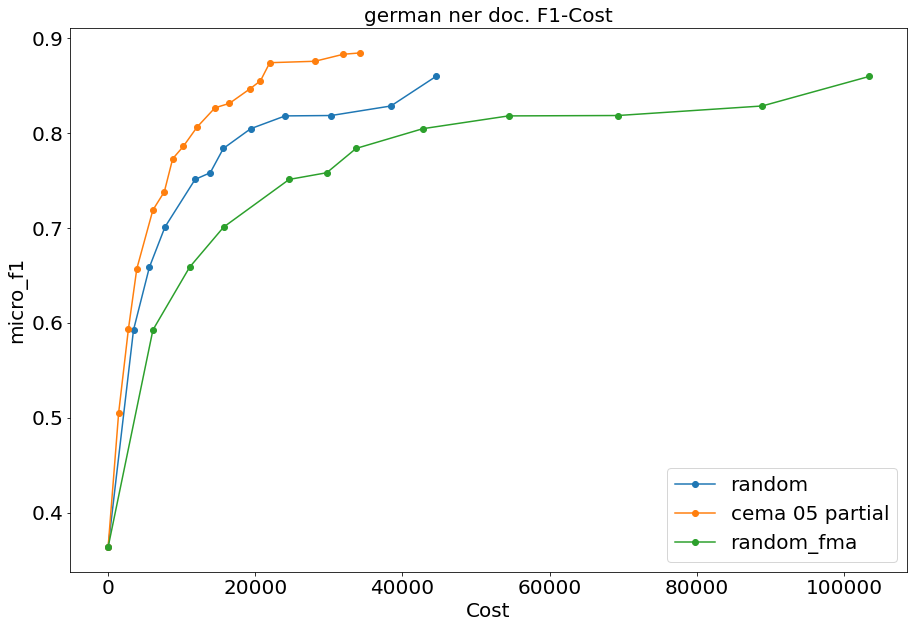

In [30]:
cost_f1 = {}
cost_some_f1 = {}
plt.figure(figsize=(15, 10))

for key in experiments_avg_results:
    
    avg_results = experiments_avg_results[key]
    new_avg_results = deepcopy(avg_results)
    if "maa" in avg_results.keys():
        cost_key = "maa"
    elif "fma" in avg_results.keys():
        cost_key = "fma"
    else:
        raise NotImplementedError
    new_avg_results[cost_key] = [cost - avg_results[cost_key][0] for cost in avg_results[cost_key]]
    avg_results = new_avg_results
    cost_f1["{}_{}".format(key, acc_key)] = avg_results[acc_key]
    cost_f1["{}_cost".format(key)] = avg_results[cost_key]
    
    avg_results = keep_increase_accuracy(avg_results, acc_key)
    
    cost_f1["{}_{}_keep_increase".format(key, acc_key)] = avg_results[acc_key]
    cost_f1["{}_cost_keep_increase".format(key)] = avg_results[cost_key]
    
    cost_some_f1["{}_{}_keep_increase".format(key, acc_key)] = []
    cost_some_f1["{}_cost_keep_increase".format(key)] = []
    for target_f1 in [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
        target_cost = linear_find_x(x_list=avg_results[cost_key], y_list=avg_results[acc_key], target_y=target_f1)
        cost_some_f1["{}_{}_keep_increase".format(key, acc_key)].append(target_f1)
        cost_some_f1["{}_cost_keep_increase".format(key)].append(target_cost)
        
    print(key, avg_results[acc_key][0], avg_results[acc_key][-1])
    label = key
    plt.plot(avg_results[cost_key], avg_results[acc_key], '-o', label=label)
        
plt.legend(prop={'size': 20}, loc='lower right')
plt.title("{} {}. F1-Cost".format(at_dataset, at_seg_level), fontdict = {'fontsize' : 20})
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Cost", fontdict = {'fontsize' : 20})
plt.ylabel("{}".format(acc_key), fontdict = {'fontsize' : 20})

In [31]:
cost_f1_series = [pd.DataFrame({key:cost_f1[key]}) for key in cost_f1]
pd.concat(cost_f1_series, axis=1).to_csv("csv/{}_cost_{}_test.csv".format(at_name, acc_key))